## Problem Statement:
You are working as a Machine learning Engineer in Tesla as part of the Autonomous driving team focused on building prototype ML model to identify and detect location of:
- Traffic Lights, Stop signs
- Other Vehicles such as Car, Bicycles, Truck etc
- Pedestrian(People)
- Animals

on the road in realtime using the Camera installed in the deck of the owners car.

### Real time constraints:

- Our Object Detection Algorithm needs to be Fast enough to **run inference in RealTime** on commodity hardware(CPU only) and **highly accurate to ensure safety.**


Let's see how we can achieve this Balance using new family of Object Detection Algorithms: **Single Stage Detectors**.



<img src ='https://drive.google.com/uc?id=1Ty9Bjh4HiCgSbXbNQ8gTGA_z4ggxZbf8'>

### Object Detection with Single Stage Detectors:
* In the last lecture you learnt how **Object detection with two stage detectors** work.
* Despite being highly accurate, there are a few problems that ` Computer Visions practitioners found with Two Stage Detectors` that limited it's real-time Application.

### Problems with RCNNs?
1. The first is that **training required multiple phases**.
  - **First Region Proposal Network (RPN)** needed
to be trained in order to generate suggested bounding boxes.
  - Then we train the **actual classifier** to recognize objects in images.
2. The second issue is that **training took too long**. A **(Faster) R-CNN consists of multiple components**, including:
  - `A Region Proposal Network`
  - `A ROI Pooling Module`
  - `The final classifier`<br>
   While all three fit together into a framework, they are still moving parts that slow down the entire training procedure.
3. The final issue, and arguably most important, is **that inference time was too slow** — we could not yet **obtain real-time object detection with deep learning**.



### How can we fix these issues?
* This can be addressed by another family of object detection method known as **Single Stage Object Detection** algorithms:

**What is Single Stage Object Detection?**



*   Single-Stage Object Detectors are a class of object detection architectures
that are one-stage.
*
They treat object detection as a simple regression problem.

*   The input image fed to the network directly outputs the class probabilities and bounding box coordinates..

<img src = 'https://i.stack.imgur.com/WYQp3.png'>




*    These models don't have the region proposal stage Region Proposal Network.

There are majorly three single Stage Detecion algorithms:

1. **Yolo**: You Only Look Once

2. **SSD**: Single Shot Detector

3. **RetinaNet**: Single-stage object detector with feature pyramid.

**Note 1:** Yolo is a preferred choice for real-world scenarios over SSD due to its faster and more efficient object detection capabilities. With the ability to detect objects of various sizes, Yolo outperforms SSD which is limited to larger objects. As a result of these limitations, SSD is not commonly used in real-world applications today.

**Note 2:** SSD algorithm is explained in the Postread of this lecture. [here](https://colab.research.google.com/drive/1o3lElrh3Vjg_P2RBV9uEU6vLLE6cKI_G?usp=share_link)



---





## Introduction to YOLO algorithm
As its name suggests, YOLO (You Only Look Once) applies a single forward pass neural network to the whole image and predicts the bounding boxes and their class probabilities as well.

This technique makes YOLO quite fast without losing a lot of accuracies.

### Version history of Yolo:

Let's see the version history of YoLO:
- In 2015, Redmon J et al. Proposed the YOLO network, which is characterized by combining the candidate box generation and classification regression into a single step
   - original paper: [https://arxiv.org/abs/1506.02640].
- Proposed architecture accelerated the speed of target detection, frame rate up to 45 fps! When predicting, the feature map is divided into 7x7 cells, and each cell is predicted, which significantly reduces the calculation complexity.

Yolo V2:
- After a one year, Redmon J once proposed an improvised version: YOLO9000 also known as YoloV2, Compared to the previous generation, the mAP on the VOC2007 test set increased from 67.4% to 78.6%. - However, in yoloV2 as well a single cell is only responsible for predicting a single object facing the goal of overlap, the recognition was not good enough.
[https://arxiv.org/abs/1612.08242]

In April 2018, the author released the third version of YOLOv3:
- Paper: [https://arxiv.org/abs/1804.02767?e05802c1_page=1]
- The mAP-50 on the COCO dataset increased from 44.0% of YOLOv2 to 57.9%.
- Compared with RetinaNet the state of the art at that time with 61.1% mAP, the detection speed is about 98 ms/frame, while YOLOv3 has 29 ms/frame when the input size is 416x416 resulting in better speed to accuracy tradeoff.
- Code: https://pjreddie.com/darknet/yolo/

- Redmon stopped his research on Object-Detection and Yolo over concerns of his research being used for Military Purpose.

Yolo V4:
- In 2020, Bochkovskiy et al. took over YOLO Research and released YoloV4 and it achieved state-of-the-art results: 43.5% mAP (65.7% mAP50) on the MS COCO dataset at a real-time speed of ∼65 FPS on the Tesla V100 GPU.
- Paper: [https://arxiv.org/abs/2004.10934]
- Code: https://github.com/AlexeyAB/darknet

Yolo V5:
- Within just two months of V4 Release, Ultralytics open sourced controversial YoloV5 without any official peer reviewed research paper, developed using pytorch framework unlike it's predecessors which used Darknet framework. However it soon gained popularity among applied community and is currently goto framework for real-time Computer Vision Applications.
- Code: [https://github.com/ultralytics/yolov5]

There has been further advancements and version releases such as Scaled YoloV4, PP-Yolo, YoloX, YoloR and Recently launched YoloV6 and V7

Detailed Timeline is given below:

<img src ='https://drive.google.com/uc?id=1aCVxSVVZ1wzBcgouFPN78hYvKXLFWQP9'>

#### We will deep dive into YOLO V3 as it serves as the Major Inspiration and baseline from which all version of Yolo has Evolved:

#### The Idea behind YOLO v3:
The author treats the object detection problem as a regression problem in the YOLO algorithm and divides the image into an S × S grid. If the center of a target falls into a grid, the grid is responsible for detecting the target

<img src = 'https://drive.google.com/uc?id=1hQ_og5QBrwF2Dt4JsO2-bsGlCK8TaBLm'>

Each grid will output a bounding box, confidence, and class probability map. Among them:

- The bounding box contains four values: x, y, w, h, (x, y) represents the center of the box. (W, h) defines the width and height of the box;
- Confidence indicates the probability of containing objects in this prediction box, which is the IoU value between the prediction box and the actual box;
- The class probability indicates the class probability of the object, and the YOLOv3 uses a two-class method


<img src = 'https://www.dlology.com/static/media/uploads/yolo/grid_cell_output.jpg'>


### Simple YOLO Architecture:
<img src = 'https://www.researchgate.net/publication/348446184/figure/fig1/AS:979760104615937@1610604420686/The-Architecture-of-YOLO-v1-An-image-goes-through-series-of-convolutional-layers.png'>

**YOLO in easy steps:**
1. Divide the image into multiple grids. For illustration, I have drawn 4x4 grids in above figure.
2. Label the training data as shown in the above figure.
  * If **C is number of unique objects** in our data, `S*S is number of grids into which we split our image`, and B is the number of proposals per grid, then our output vector will be of length `S*S*(C + B*5)`.
  * **For e.g.** in above case, our target vector is 4x4x(3+5) as we divided our images into 4*4 grids and are training for `3 unique objects: Car, Light and Pedestrian`.

3. Make one deep convolutional neural net with **loss function as error between output activations and label vector**.
  * Basically, `the model predicts the output of all the grids in just one forward pass of input image through ConvNet`.
4. **Keep in mind that the label for object being present in a grid cell (P.Object) is determined by the presence of object’s centroid in that grid.**
  * This is important to not allow one object to be counted multiple times in different grids.

The **main advantage Of YOLO** is, it is  very **fast** as the model predicts the output of all the grids in just `one forward pass of input image through ConvNet.`

#### Question: What if we have multiple objects present in a single Grid Cell ?

* **Anchor Boxes is the way to detect multiple objects in the same grid cell.**
* With the idea of anchor boxes, what you are going to do, is **pre-define two different shapes** called, `anchor boxes or anchor box shapes`.
* Next step is to **associate two predictions with the two anchor boxes**.
* And in general, `you might use more anchor boxes, maybe five or even more`.

<img src='https://images.velog.io/images/cha-suyeon/post/ca30b9e7-e4df-4156-8736-54241aaa0ba8/image.png' width=800>

* In the above image Mid point of both `Person` and `car` lies in the same Grid Cell.
* We have already Pre-defined two bounding box for each class.
* The output will be 2 Anchor boxes.

**What object Detection algorithm does Previously?**
* `Each Object in training image is assigned to grid cell that contains that object midpoint's`.

**How Object Detection with Anchor Boxes Works?**
* `Each Object in training image is assigned to grid cell that contains that object midpoint's` **and Anchor Box for the Grid Cell with Highest IoU**

Let's look at the example.

* In this example `person is more similar to shape of Anchor Box 1` and **hence have Highest IoU with Anchor Box1**.
* And Car is more similar to shape of `Anchor Box 2` and have **Highest IoU with Anchor Box2**.
* So, in **final output y we see both Anchor Box output and their co-ordinates.**

## YOLO Loss

<img src ='https://drive.google.com/uc?id=1FuzNbj0zs6wzU2nnlk470V_9jNRatY21' height = 600 width = 800>



### Yolo V3 Architecture details:

<!-- <img src ='https://drive.google.com/uc?id=1u0N9K9QuHDlxLhxD5bAppE-ubIjSsrrW'> -->




<img src='https://miro.medium.com/v2/resize:fit:2000/format:webp/1*d4Eg17IVJ0L41e7CTWLLSg.png' height= 300 width=1000>


- As mentioned in the [original paper](https://pjreddie.com/media/files/papers/YOLOv3.pdf), First, YOLO v3 uses a variant of Darknet, which originally has 53 layer network trained on Imagenet.
- For the task of detection, 53 more layers are stacked onto it, giving us a 106 layer fully convolutional underlying architecture for YOLO v3.
- The figure is mainly composed of Convolutional and Residual structures.
- It should be noted that the last three layers Avgpool, Connected, and softmax layer, are used for classification training on the Imagenet dataset.
- When using the Darknet-53 layer to extract features from the picture, these three layers are not used:

<img src = 'https://drive.google.com/uc?id=1SFJralLa4OU3MfZ_BJIPuBJK--5Eiik6'>

The reason behind picking darknet-53 as the backbone was:
1. Darkent53 was comparable to the most advanced classifiers talking about accuracy, and it has fewer floating-point operations and the fastest calculation speed. Compared with ResNet-101, the speed of the Darknet-53 network is 1.5 times that of the former; although ReseNet-152 and its performance are similar, it takes more than two times.
2. it has highest measurement floating-point operation per second, which means that the network structure can better use the GPU, thereby making it more efficient and faster.

<img src ='https://drive.google.com/uc?id=1m0xSJsJnIok5O9Na2LNiw7fNSB9gOk6K'>

<img src='https://miro.medium.com/v2/resize:fit:2000/format:webp/1*vISVnk-prof925j3f1ZDDQ.png'>

In [ ]:
def _conv_block(inp, convs, skip=True):
	x = inp
	count = 0
	for conv in convs:
		if count == (len(convs) - 2) and skip:
			skip_connection = x
		count += 1
		if conv['stride'] > 1: x = ZeroPadding2D(((1,0),(1,0)))(x) #padding as darknet prefer left and top
		x = Conv2D(conv['filter'],
				   conv['kernel'],
				   strides=conv['stride'],
				   padding='valid' if conv['stride'] > 1 else 'same', #  padding as darknet prefer left and top
				   name='conv_' + str(conv['layer_idx']),
				   use_bias=False if conv['bnorm'] else True)(x)
		if conv['bnorm']: x = BatchNormalization(epsilon=0.001, name='bnorm_' + str(conv['layer_idx']))(x)
		if conv['leaky']: x = LeakyReLU(alpha=0.1, name='leaky_' + str(conv['layer_idx']))(x)
	return add([skip_connection, x]) if skip else x

In [ ]:
def make_yolov3_model():
	input_image = Input(shape=(None, None, 3))
	# Layer  0 => 4
	x = _conv_block(input_image, [{'filter': 32, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 0},
								  {'filter': 64, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 1},
								  {'filter': 32, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 2},
								  {'filter': 64, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 3}])
	# Layer  5 => 8
	x = _conv_block(x, [{'filter': 128, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 5},
						{'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 6},
						{'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 7}])
	# Layer  9 => 11
	x = _conv_block(x, [{'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 9},
						{'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 10}])
	# Layer 12 => 15
	x = _conv_block(x, [{'filter': 256, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 12},
						{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 13},
						{'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 14}])
	# Layer 16 => 36
	for i in range(7):
		x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 16+i*3},
							{'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 17+i*3}])
	skip_36 = x
	# Layer 37 => 40
	x = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 37},
						{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 38},
						{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 39}])
	# Layer 41 => 61
	for i in range(7):
		x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 41+i*3},
							{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 42+i*3}])
	skip_61 = x
	# Layer 62 => 65
	x = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 62},
						{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 63},
						{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 64}])
	# Layer 66 => 74
	for i in range(3):
		x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 66+i*3},
							{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 67+i*3}])
	# Layer 75 => 79
	x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 75},
						{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 76},
						{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 77},
						{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 78},
						{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 79}], skip=False)
	# Layer 80 => 82
	yolo_82 = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 80},
							  {'filter':  255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 81}], skip=False)
	#56x56x256
	# Layer 83 =>
	#128x128 -> 56x56 #Downsampling 128x128 + 56x56
	x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 84}], skip=False)
	x = UpSampling2D(2)(x) #(56x56) -> 128x128
	x = concatenate([x, skip_61]) #Skip connection
	# Layer 87 => 91
	x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 87},
						{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 88},
						{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 89},
						{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 90},
						{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 91}], skip=False)
	# Layer 92 => 94
	yolo_94 = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 92},
							  {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 93}], skip=False)
	#28x28x128
	# Layer 95 => 98
	x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True,   'layer_idx': 96}], skip=False)
	x = UpSampling2D(2)(x)
  #Upsample(8*8) 16*16
	x = concatenate([x, skip_36])
	# Layer 99 => 106
	yolo_106 = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 99},
							   {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 100},
							   {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 101},
							   {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 102},
							   {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 103},
							   {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 104},
							   {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 105}], skip=False)
	#8x8x512
	model = Model(input_image, [yolo_82, yolo_94, yolo_106])
	return model

Check this link to apply yolov3 pretrained model for object detection:
https://machinelearningmastery.com/how-to-perform-object-detection-with-yolov3-in-keras/

### Let's go back to our problem statement and see how we can using Pre-Trained YoloV5 to solve it:

Why YOLO V5:
- We are going to use pre-trained Yolo V5 models for our use case since they are trained using COCO-Dataset (https://cocodataset.org/#home) and already contain the Target-Classes which we want to Detect:
      - 'Car' , 'motorbike','aeroplane', 'bus',  'truck'
      - Traffic light
      - Person
      - so on..

- Due to it's choice of framework being pytorch it's highly popular in Applied CV Community
- Pytorch models can be easily migrated to other frameworks such as onnx, tensorflow.
- It's faster than YoloV4 and has 5 checkpoints for different memory and speed requirements.

- For more details Check this blog:
https://blog.roboflow.com/yolov5-is-here/

- We will be using ONNX Format of YoloV5

#### What is ONNX?

ONNX is an open format built to represent machine learning models. ONNX defines a common set of operators - the building blocks of machine learning and deep learning models - and a common file format to enable AI developers to use models with a variety of frameworks, tools, runtimes, and compilers

Using ONNX, solution developed using one framework can be easily deployed in another framework and vice versa.


[https://onnx.ai/]


#### Let's Start with downloading the dataset and explore:

In [ ]:
!gdown 1Y5OHRq4KPVZuvY2BnuUnsEXq9o_GuzBM

Downloading...
From (original): https://drive.google.com/uc?id=1Y5OHRq4KPVZuvY2BnuUnsEXq9o_GuzBM
From (redirected): https://drive.google.com/uc?id=1Y5OHRq4KPVZuvY2BnuUnsEXq9o_GuzBM&confirm=t&uuid=db69092b-9b0d-4ec5-b74d-d127230826a7
To: /content/selfdriving cars data.zip
100% 946M/946M [00:14<00:00, 63.6MB/s]


In [ ]:
!ls

 sample_data  'selfdriving cars data.zip'


In [ ]:
!unzip -q '/content/selfdriving cars data.zip'

In [ ]:
!ls 'selfdriving cars data'

images	labels_train.csv  labels_trainval.csv  labels_val.csv


In [ ]:
from glob import glob

print("Sample Images: ")
glob('/content/selfdriving cars data/images/*jpg')[:5]

Sample Images: 


['/content/selfdriving cars data/images/1478901292448164671.jpg',
 '/content/selfdriving cars data/images/1478897866423700634.jpg',
 '/content/selfdriving cars data/images/1478897636764317197.jpg',
 '/content/selfdriving cars data/images/1479503258798186153.jpg',
 '/content/selfdriving cars data/images/1479501401155784489.jpg']

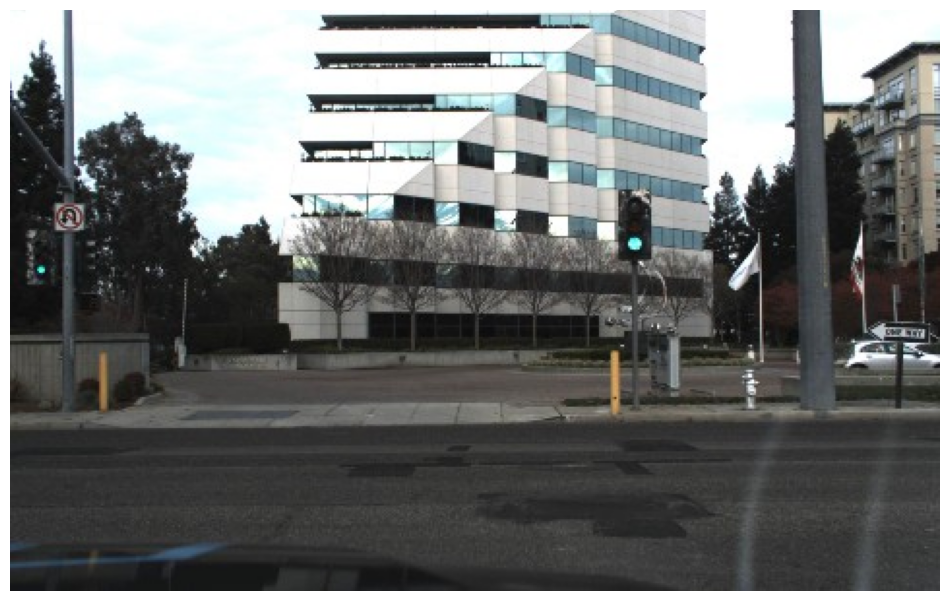

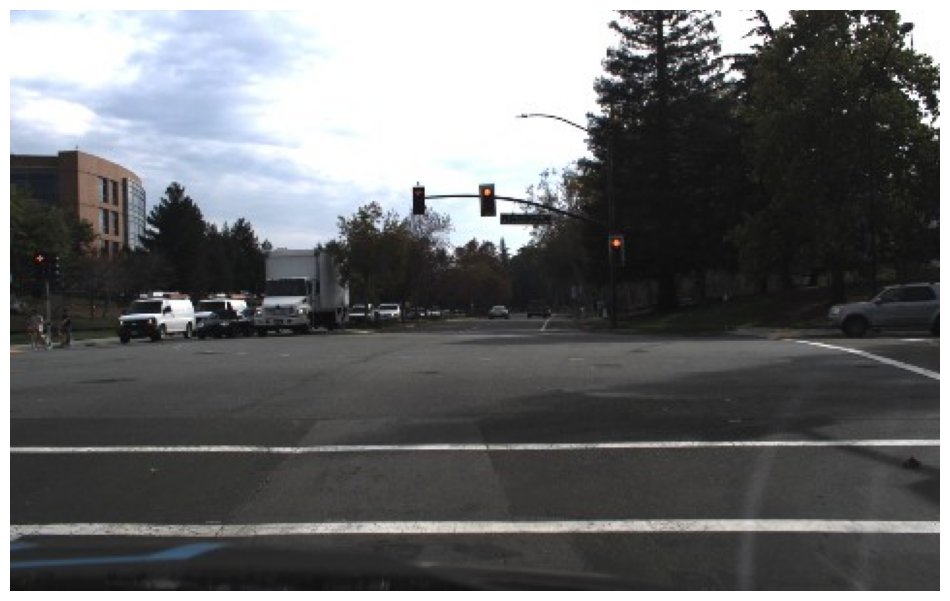

In [ ]:
## let's plot top two images in dataset
import matplotlib.pyplot as plt

for image_path in glob('/content/selfdriving cars data/images/*jpg')[:2]:
  plt.figure(figsize=(12,8))
  img = plt.imread(image_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()


### Let's get the Model Files and config as well:

In [ ]:
!gdown 1g7BocB3bO9l3qk8pzBmn7F32A9ib3Tf2

Downloading...
From (original): https://drive.google.com/uc?id=1g7BocB3bO9l3qk8pzBmn7F32A9ib3Tf2
From (redirected): https://drive.google.com/uc?id=1g7BocB3bO9l3qk8pzBmn7F32A9ib3Tf2&confirm=t&uuid=71c4c021-1c79-4909-86d1-f76ca2e3d87a
To: /content/YoloV5_ONNX.zip
100% 31.3M/31.3M [00:01<00:00, 30.0MB/s]


In [ ]:
!unzip -q '/content/YoloV5_ONNX.zip'

In [ ]:
ls

 coco.names.txt   sample_data/             'selfdriving cars data.zip'   YoloV5_ONNX.zip
 __MACOSX/       'selfdriving cars data'/   yolov5n.onnx                 yolov5s.onnx


- The files ending with ONNX are our saved Model Files.

> Indented block


- coco.names contains all the 90 Class Labels which were used to train the Yolo Model.

Let's checkout the content of coco.names file:

In [ ]:
# Load class names.
classesFile = "/content/coco.names.txt"
classes = None

with open(classesFile, 'rt') as f:
      classes = f.read().rstrip('\n').split('\n')

# print ID and value of classes in COCO
print(dict(enumerate(classes)))

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorbike', 4: 'aeroplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'sofa', 58: 'pottedplant', 59: 'bed', 60: 'diningtable', 61: 'toilet', 62: 'tvmonitor', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'mi

As You can see it contains 90 different classes of which some are similar to what we want to detect in our Use-Case

#### Let's setup config for model

In [ ]:
import cv2
import numpy as np

# input image width and height
INPUT_WIDTH = 640
INPUT_HEIGHT = 640
#[0.9 , bb1,bb2,bb3,bb4, pc1, pc2,....,pc80]
# probability threshold to filter boxes with object or no object
OBJECT_SCORE_THRESHOLD = 0.5
#3 Feature Maps -> SxS grids -> 3 Anchor boxes
# # probability threshold to detect and Assign Class
CLASS_CONFIDENCE_THRESHOLD = 0.45

# IOU AREA Threshold to suppress redundant boxes using NMS
NMS_THRESHOLD = 0.45 #Non Max

# Text parameters used for annotating label on Image
FONT_FACE = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 0.4
THICKNESS = 1
BOX_COLOR = (0,255,255)
FONT_COLOR= (0,0,0)


In [ ]:
def draw_label(im, label, x, y):
    """Function used for Drawing text/label onto image at location."""

    # Get text size.
    text_size = cv2.getTextSize(label, FONT_FACE, FONT_SCALE, THICKNESS)
    dim, baseline = text_size[0], text_size[1]

    # Use text size to create a BLACK rectangle.
    cv2.rectangle(im, (x,y), (x + dim[0], y - (dim[1]+baseline) ), (255,255,255), cv2.FILLED);

    # Display text inside the rectangle.
    cv2.putText(im, label, (x, y - dim[1]+baseline ), FONT_FACE, FONT_SCALE, FONT_COLOR, THICKNESS, cv2.LINE_AA)

In [ ]:
#Feature Extraction
def yolo_forward_pass(input_image, net):
      """Performs forward pass to generate prediction using image and Loaded Yolo Model as parameters """
      # Create a 4D blob from a frame
      blob = cv2.dnn.blobFromImage(input_image, 1/255,  (INPUT_WIDTH, INPUT_HEIGHT), [0,0,0], 1, crop=False)

      # Sets the input to the network.
      net.setInput(blob)

      # Run the forward pass to get output of the output layers.
      outputs = net.forward(net.getUnconnectedOutLayersNames())

      return outputs #[FMl1, FMl2, FMl3]

In [ ]:
def post_process_outputs(input_image, outputs):
      """ Takes Model Prediction outputs from forward pass function and performs post-processing tasks:
      1. Removing predictions with Low Confidence score
      2. Filtering only classes required for our task such as
      Vehicles, Human, traffic light stop sgn etc
      3. Perform NMS to suppress redundant or Duplicate boxes
      4. Annotate/draw remaining boxes on the Image
      """
      # Lists to hold respective values while unwrapping.
      class_ids = []
      confidences = []
      boxes = []

      # Rows
      rows = outputs[0].shape[1]
      image_height, image_width = input_image.shape[:2]

      # Resizing factor.
      x_factor = image_width / INPUT_WIDTH
      y_factor =  image_height / INPUT_HEIGHT

      # Iterate through detections.
      #[bb1,bb2,bb3,bb4, 0.9 ,  pc1, pc2,....,pc80]
      #[BB, obj score, class scores]
      for r in range(rows):
            row = outputs[0][0][r] #BB cordinate map#0,1,2,3
            confidence = row[4] #First 4 BB, 5th one for COnf #Object confidence score

            # Discard bad detections and continue.
            #AB<50% -> discard
            #AB >50 % chance i have captured an object
            if confidence >= OBJECT_SCORE_THRESHOLD:
                  classes_scores = row[5:] #80 class scores#row[5:] # x,y,w,h,Pc

                  # Get the index of max class score.
                  class_id = np.argmax(classes_scores)

                  #  Continue if the class score is above threshold.
                  # What is diff betn obj score class score
                  if (classes_scores[class_id] > CLASS_CONFIDENCE_THRESHOLD):
                        confidences.append(confidence)
                        class_ids.append(class_id)
                        cx, cy, w, h = row[0], row[1], row[2], row[3]

                        left = int((cx - w/2) * x_factor)
                        top = int((cy - h/2) * y_factor)
                        width = int(w * x_factor)
                        height = int(h * y_factor)

                        box = np.array([left, top, width, height])
                        boxes.append(box)

      # filter redundant Boxes using NMS Threshold
      indices = cv2.dnn.NMSBoxes(boxes, confidences, CLASS_CONFIDENCE_THRESHOLD, NMS_THRESHOLD)

      # plot remaining boxes
      for i in indices:
            box = boxes[i]
            left = box[0]
            top = box[1]
            width = box[2]
            height = box[3]

            # Draw bounding box.
            cv2.rectangle(input_image, (left, top), (left + width, top + height), BOX_COLOR, 2*THICKNESS)

            # Class label.
            label = "{}:{:.2f}".format(classes[class_ids[i]], confidences[i])

            # Draw label.
            draw_label(input_image, label, left, top)

      return input_image


In [ ]:
sample_images = ['/content/selfdriving cars data/images/1478732518231513348.jpg',
 '/content/selfdriving cars data/images/1478900224707428956.jpg',
 '/content/selfdriving cars data/images/1478898970726449449.jpg',
 '/content/selfdriving cars data/images/1478895374457789828.jpg',
 '/content/selfdriving cars data/images/1479504796899191419.jpg',
 '/content/selfdriving cars data/images/1479498467969466999.jpg']

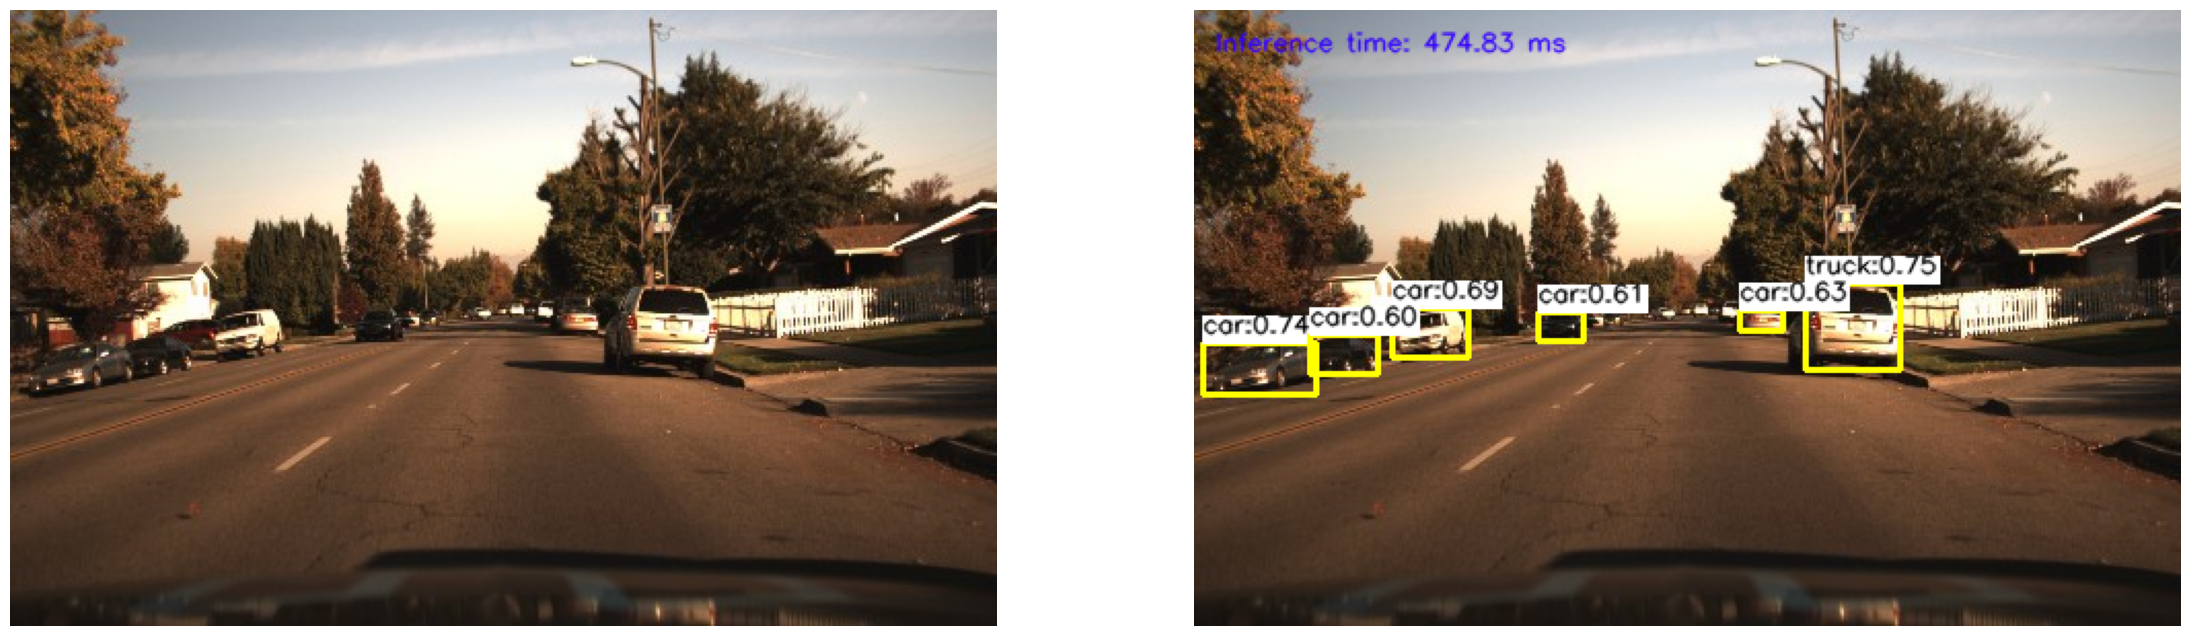

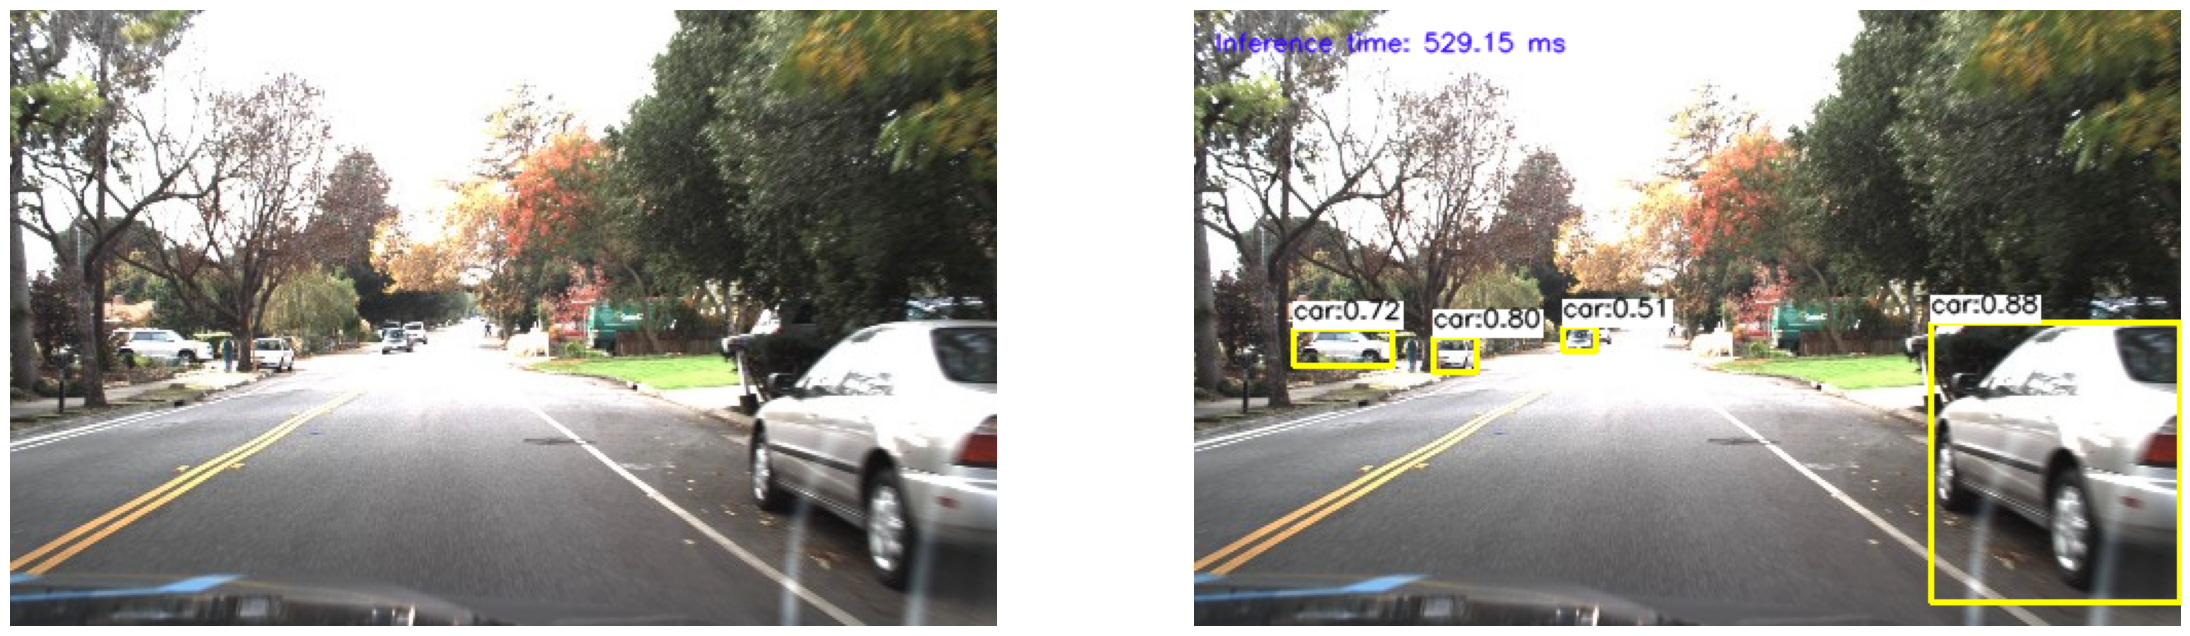

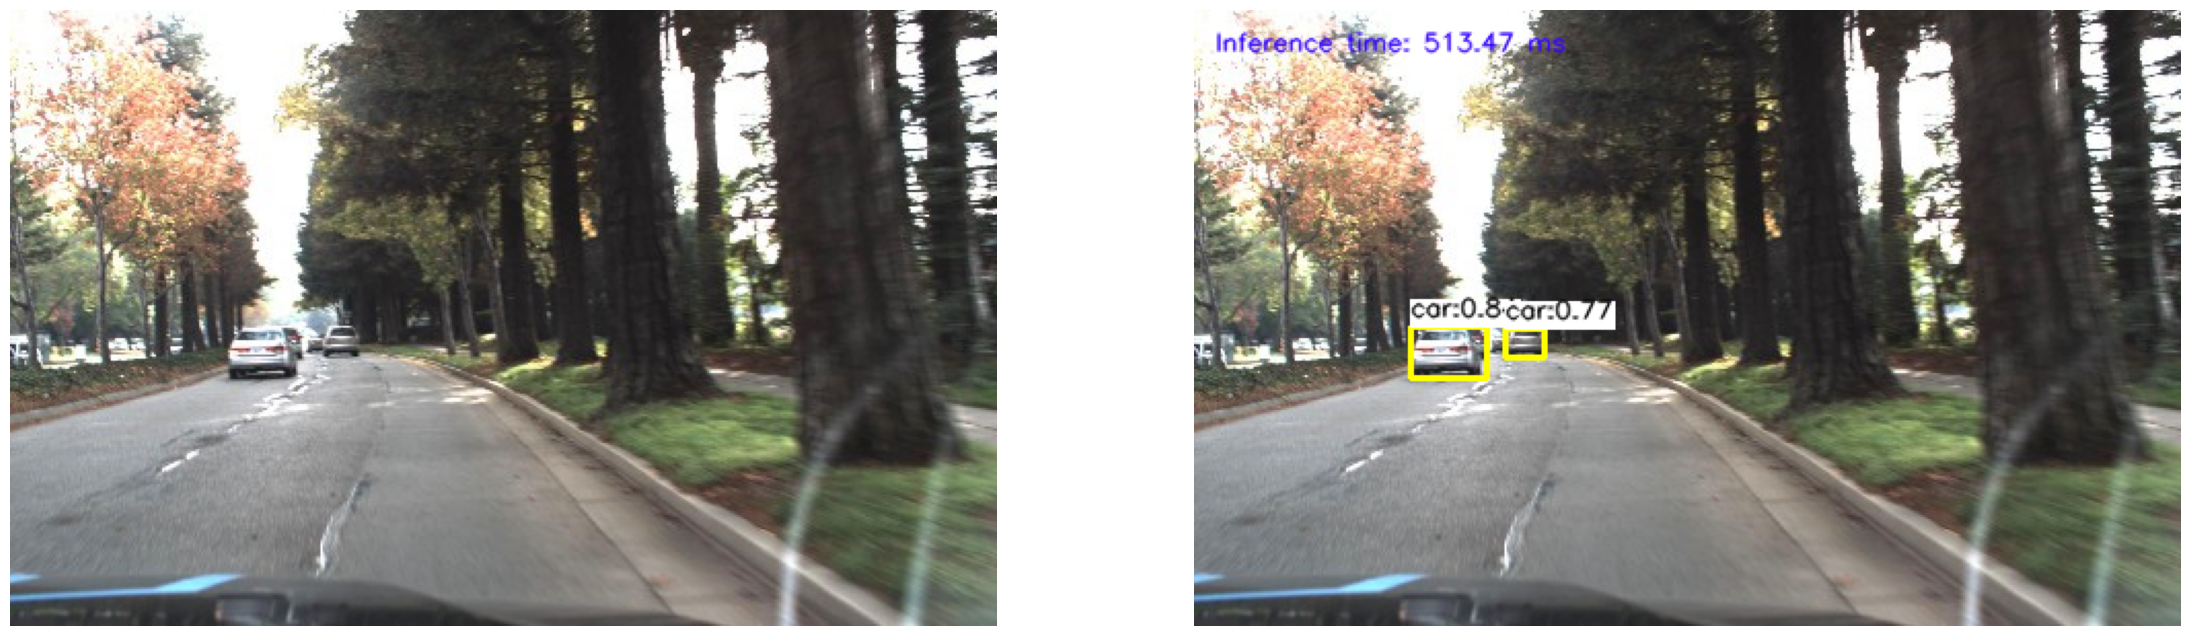

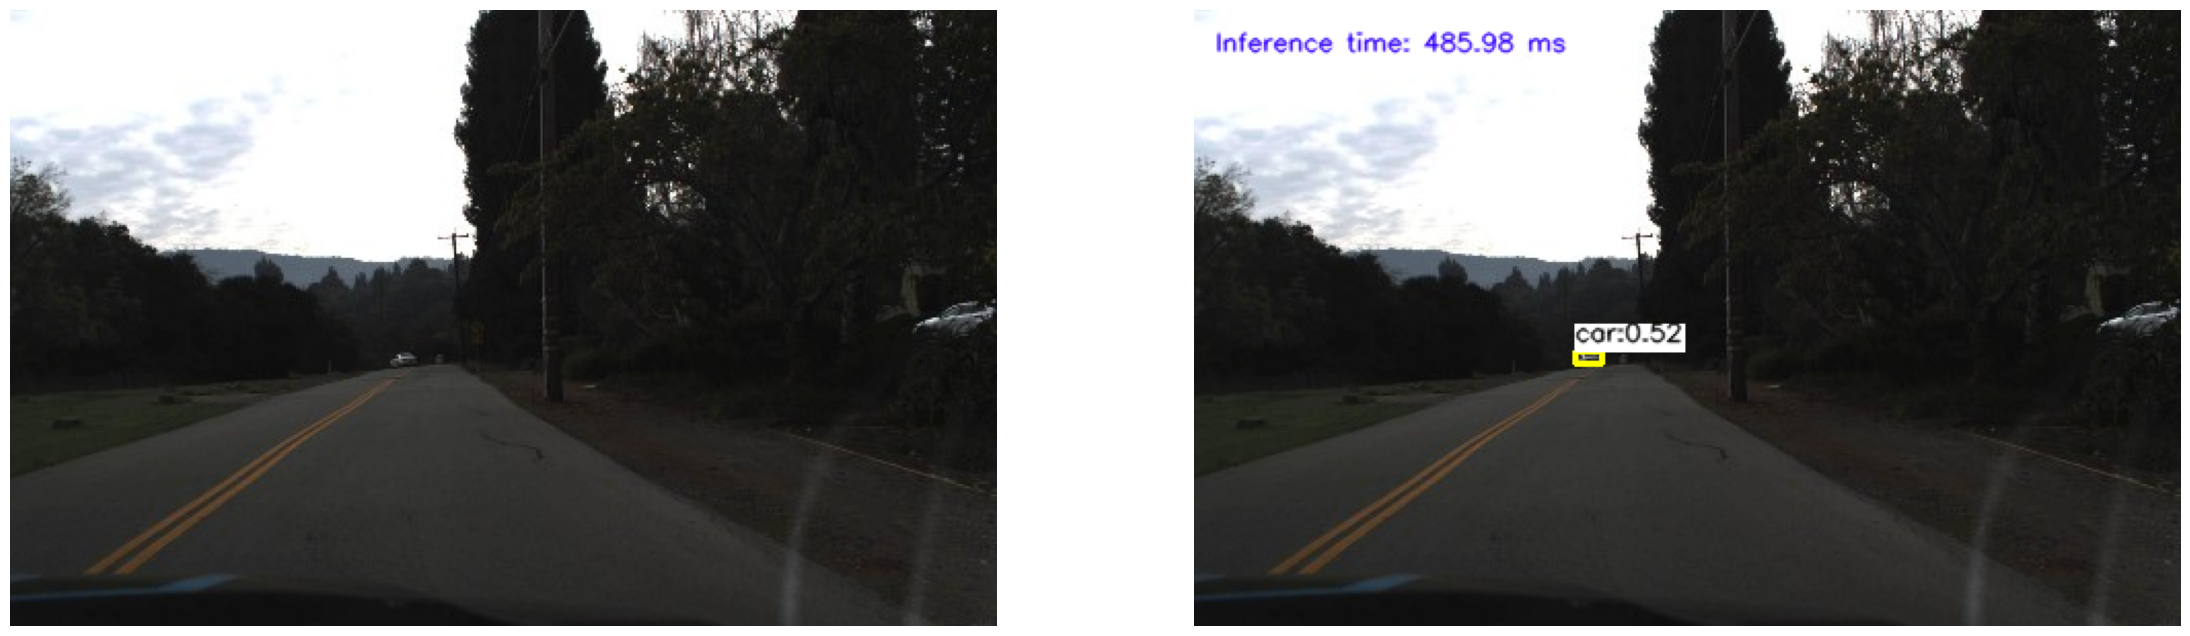

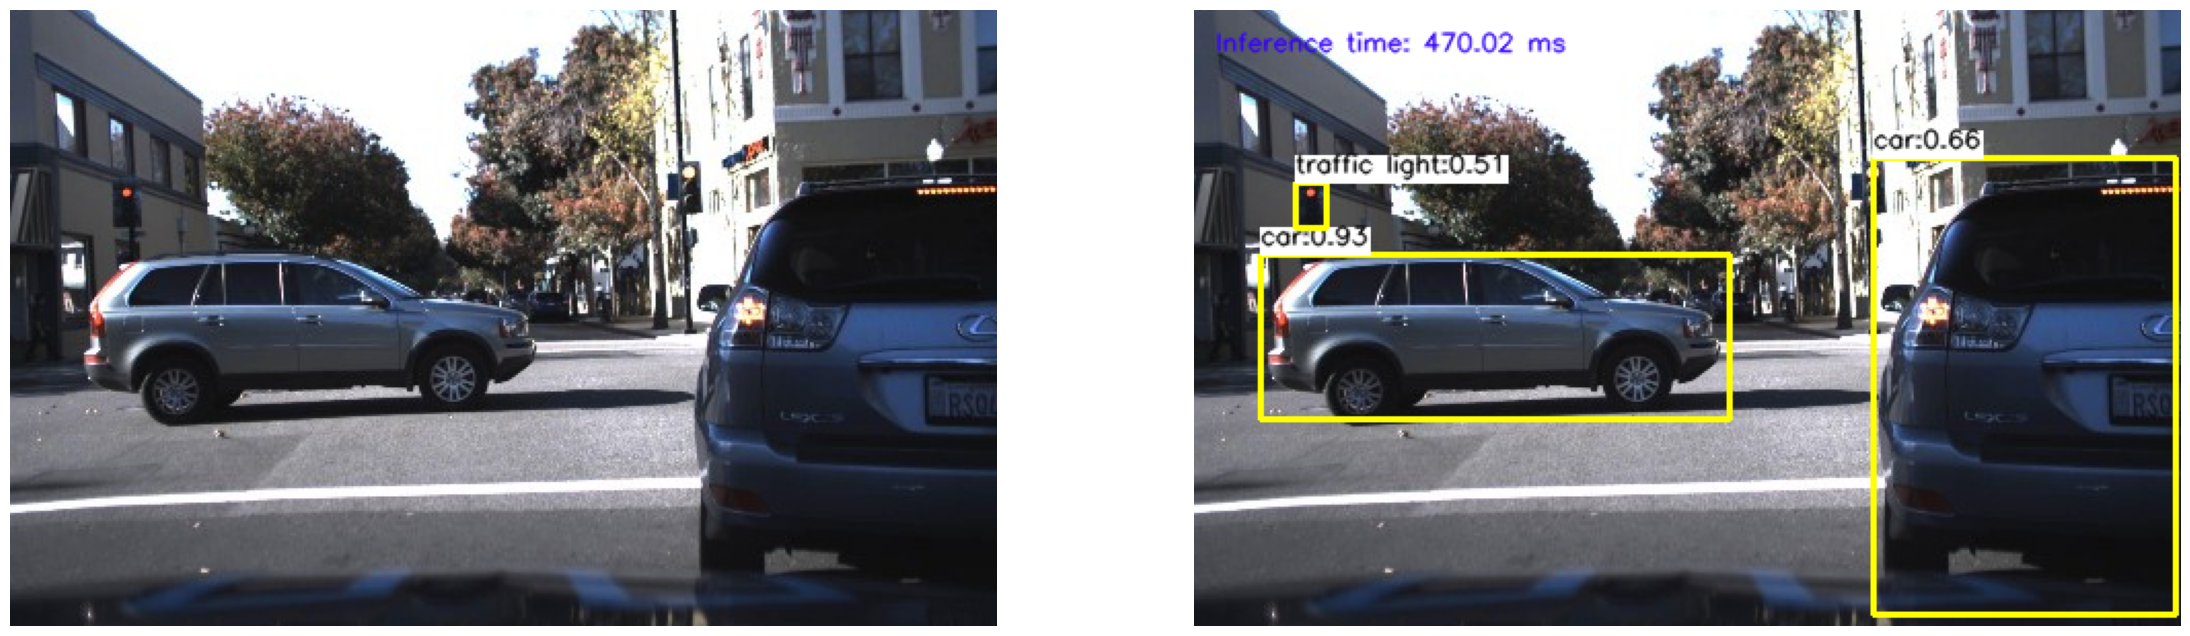

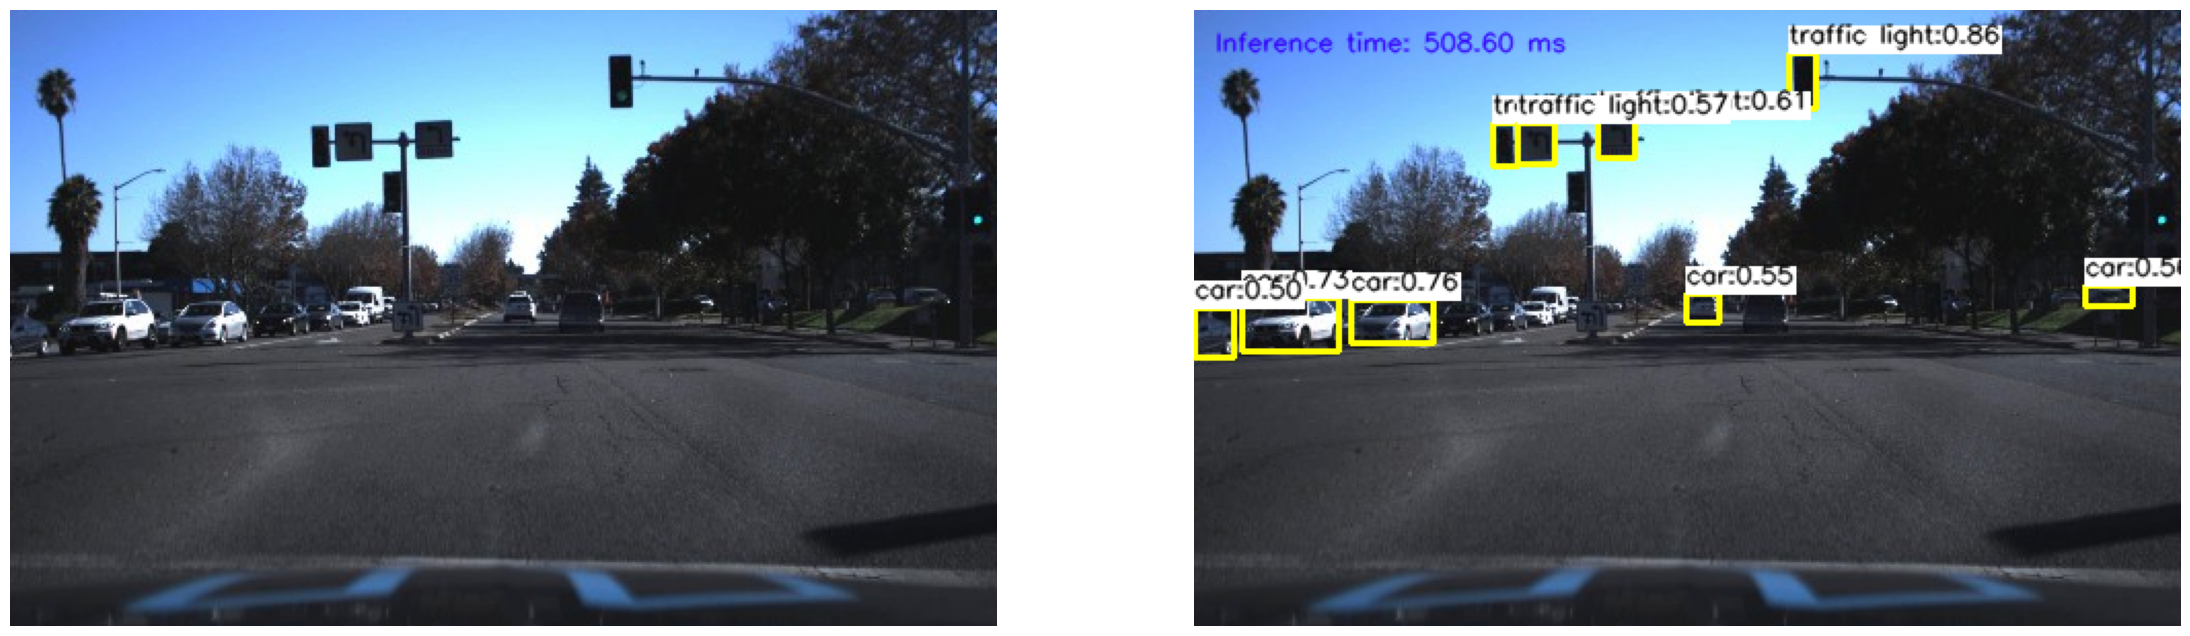

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


# Load class names.
classesFile = "/content/coco.names.txt"
classes = None

with open(classesFile, 'rt') as f:
      classes = f.read().rstrip('\n').split('\n')

# Load the model using cv2.dnn.readNet: Yolo V5 Nano Model
modelWeights = "/content/yolov5n.onnx"
net = cv2.dnn.readNet(modelWeights)

for image_path in sample_images:
  # Load image
  frame = cv2.imread(image_path)


  # Process image:
  detections = yolo_forward_pass(frame, net)
  pred_img = post_process_outputs(frame.copy(), detections)

  """
  Annotate efficiency information. The function getPerfProfile returns the overall time for inference(t)
  and the timings for each of the layers(in layersTimes).
  """
  t, _ = net.getPerfProfile()
  label = 'Inference time: %.2f ms' % (t * 1000.0 /  cv2.getTickFrequency())
  cv2.putText(pred_img, label, (10, 20), FONT_FACE, FONT_SCALE,  (255, 0, 50), THICKNESS, cv2.LINE_AA)

  fig = plt.figure(figsize=(28,16))
  ax1 = fig.add_subplot(1,2,1)
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB )
  ax1.imshow(frame)
  ax1.axis('off')


  ax2 = fig.add_subplot(1,2,2)
  pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB )
  ax2.imshow(pred_img)
  ax2.axis('off')

  plt.show()


- It did a great job of predicting Vehicles and Traffic light with just the pre-trained model and
- Every image was processed in less than a Second on CPU without any specialized hardware(1000 ms = 1 second).
- To Enhance performance we can finetune the model on our custom dataset as well.

### Question:
    - Try tuning Score threshild and Class threshold probabilities and check impact on predictions.
    - Evaluate MAP of the pre-trained model on full dataset
    - Run inference using Other Variants of Yolo Model and compare performance in terms of Latency and Accuracy/MAP
    - Fine tune the model on dataset and compare performance with Pre-Trained Model in terms of MAP.


### Conclusion:
- Using Single Stage Detection method specifically pre-trained YOLOV5 Model, we developed a very fast and accurate detector for our use case which can run inferences in Real Time (few 100 milliseconds).


- Yolo Models are super fast and accurate for majority of real-time Applications, However there's one area where YoLO models struggle: Detecting very Small and Sparse objects(Hard Detection) such as object from Satellite Images.




### Video Inference: (Optional)

Let's Run our Inference on Video:

In [ ]:
#https://drive.google.com/file/d/1KyOIRWMBE-oX7em0bhTPkBbbM5mAlKII/view?usp=sharing
!gdown 1KyOIRWMBE-oX7em0bhTPkBbbM5mAlKII

Downloading...
From: https://drive.google.com/uc?id=1KyOIRWMBE-oX7em0bhTPkBbbM5mAlKII
To: /content/Vid_Self-Driving_Demo.mp4
100% 41.4M/41.4M [00:00<00:00, 87.0MB/s]


In [ ]:
!ls

 coco.names.txt  'selfdriving cars data'       yolov5n.onnx
 __MACOSX	 'selfdriving cars data.zip'   YoloV5_ONNX.zip
 sample_data	  Vid_Self-Driving_Demo.mp4    yolov5s.onnx


In [ ]:
import cv2

# path where video is stored
vid_path = 'Vid_Self-Driving_Demo.mp4'


In [ ]:
## Count number of Frames for progress Bar
def count_frames(video_path, manual=False):
  '''
  This function calculate total count of frames in video
  '''
  def manual_count(handler):
      frames = 0
      while True:
          status, frame = handler.read()
          if not status:
              break
          frames += 1
      return frames

  stream = cv2.VideoCapture(video_path)
  # Slow, inefficient but 100% accurate method
  if manual:
      frames = manual_count(stream)
  # Fast, efficient but inaccurate method
  else:
      try:
          frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
      except:
          frames = manual_count(cap)
  stream.release()
  return frames


frame_count = count_frames(vid_path, manual=True)
print("Total Frames: ", frame_count)

Total Frames:  2801


In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
from tqdm.auto import tqdm

stream = cv2.VideoCapture(vid_path)
ret, img_src = stream.read()

output = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'DIVX'),30 , (img_src.shape[1],img_src.shape[0]))


# Load class names.
classesFile = "/content/coco.names.txt"
classes = None

with open(classesFile, 'rt') as f:
      classes = f.read().rstrip('\n').split('\n')


# Load the model using cv2.dnn.readNet: Yolo V5 Small
modelWeights = "/content/yolov5s.onnx"
net = cv2.dnn.readNet(modelWeights)


# Initiate the progress bar
with tqdm(total=frame_count-1) as pbar:
  # start looping over video stream to extract frame and run inference
  while True:
      # Read frame from camera
      ret, image_np = stream.read()
      if not ret:
        break

      # Load image
      frame = cv2.imread(image_path)

      # Process image:
      detections = yolo_forward_pass(image_np, net)
      img = post_process_outputs(image_np.copy(), detections)

      """
      Annotate efficiency information. Method getPerfProfile of net object returns the overall time for inference(t)
      and the timings for each of the layers(in layersTimes).
      """
      t, _ = net.getPerfProfile()
      label = 'Inference time: %.2f ms' % (t * 1000.0 /  cv2.getTickFrequency())
      cv2.putText(img, label, (10, 20), FONT_FACE, FONT_SCALE,  (0, 255, 200), THICKNESS, cv2.LINE_AA)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



      # Display output: Doesn't work in colab Environment: Uncomment to play the follwing video in standard environment
      #cv2.imshow( cv2.resize(image_np_with_detections, (800, 600)))
      output.write(img)

      # update the progress bar
      pbar.update(1)

      if cv2.waitKey(25) & 0xFF == ord('q'):
          break

  stream.release()
  output.release()
  cv2.destroyAllWindows()
  print("Processing Complete. Download and Play the Video File named 'Output.mp4' ")

  0%|          | 0/2800 [00:00<?, ?it/s]

Processing Complete. Download and Play the Video File named 'Output.mp4' 


In [ ]:
ls

 coco.names.txt   sample_data/                 Vid_Self-Driving_Demo.mp4   yolov5s.onnx
 __MACOSX/       'selfdriving cars data'/      yolov5n.onnx
 output.mp4      'selfdriving cars data.zip'   YoloV5_ONNX.zip


In [ ]:
from google.colab import files
files.download('output.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- Note that Every Second of a Video Contains 24+ Frames i.e. 24 Images so it might take around 20 mins to process the whole video on CPU.

- We can sample a small number of frames from every second depending on the speed of Change in Business-case at hand to make video inference Even Faster.

- Demo on working video:
https://drive.google.com/file/d/1QAMcZSNjJDqVTnFEDR0RRFFa5COJ5ay-/view?usp=sharing

##**POST READ**

---


### Difference between YOLOv3 and RetinaNet and need for RetinaNet:

<img src ='https://drive.google.com/uc?id=1kgZ6Ay9qFrc7D5kRj6IRKJD2W8_JLJQ7' height = 450>

Crucial Advantages of RetinaNet: Here are Some Points for Why We Need This Object Detection Model:

1. High accuracy: RetinaNet achieves high accuracy, with an mAP of 82.89%. This makes it a good option for applications where accuracy is crucial.

2. Better at detecting rotated objects: RetinaNet is better at detecting rotated objects than YOLOv3. Therefore, it may be a better option for applications where objects may be oriented in different ways.

3. Class imbalance: RetinaNet addresses class imbalance during training by utilizing two-stage cascade and sampling heuristics. This makes it a good option for applications where class imbalance is a concern.

4. Focal Loss: RetinaNet uses Focal Loss to prevent the easy background examples from overwhelming the network during training. This can help improve its accuracy and make it a good option for applications where object detection is challenging.

However, it is important to note that RetinaNet may not be the best option for applications that require real-time object detection, as its detection speed is slower than YOLOv3. It may also not be ideal for applications where large datasets are hard to obtain. Small objects and close-by objects may be missed by YOLO like algorithms.



In our opinion, the relevance of SSDs has significantly decreased over time, making discussions about them somewhat redundant. Even if you are interested in learning about SSD, I recommend that you read this post. [Link](https://colab.research.google.com/drive/1o3lElrh3Vjg_P2RBV9uEU6vLLE6cKI_G?usp=share_link)



---



---



## Introduction: What is RetinaNet Model? [POST READ]

* **Facebook AI research (FAIR )** team has introduced RetinaNet model with aim to tackle **dense and small objects detection problem**.

* For this reason, it has become a popular object detection model that one can use with **aerial and satellite imagery also**.

* **RetinaNet** has majorly **two improvements over existing single stage object detection models** –

  - Feature Pyramid Networks (FPN)
  - Focal Loss

## Architecture of RetinaNet Model

In essence, we can **break down RetinaNet architecture in to 3 following components**:

> Indented block



1. `Backbone Network` (i.e. Bottom up pathway + Top down pathway with lateral connections **eg. ResNet + FPN**)
2. `Sub-network for object Classification`
3. `Sub-network for object Regression`

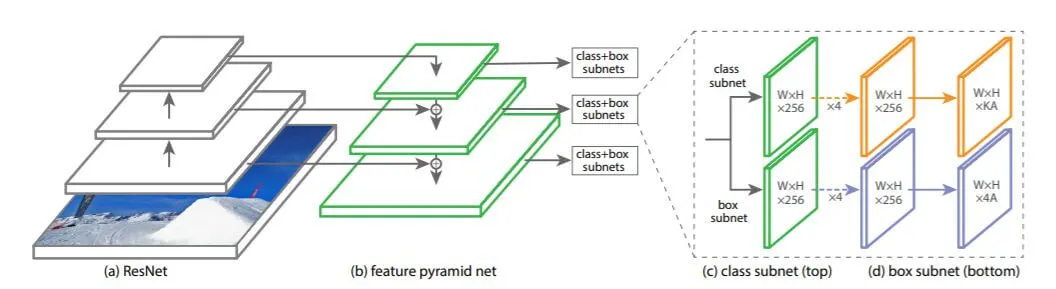

For better understanding, Let’s understand each component of architecture separately

### The backbone Network

**Bottom up pathway:**
  - Bottom up pathway (eg. ResNet) is used for **feature extraction**.
  - So, It calculates `the feature maps at different scales`, **irrespective of the input image size**.

**Top down pathway with lateral connections:**
  - The top down pathway up samples the spatially coarser feature maps from higher pyramid levels.
  - And the lateral connections merge the **top-down layers** and the **bottom-up layers** with the same spatial size.

* `Higher level feature maps` tend to have `small resolution` though semantically stronger and is therefore more suitable for detecting **larger objects**.
* On the contrary, `grid cells from lower level feature maps` have `high resolution` and hence are better at **detecting smaller objects**.

* So, with combination of the **top-down pathway and its lateral connections with bottom up pathway** which do not require much extra computation, `every level of the resulting feature maps can be both semantically and spatially strong`.

* Hence this architecture is **scale-invariant** and can provide **better performance both in terms of speed and accuracy**.

### Sub-network for object Classification

* **Fully convolutional network (FCN)** is attached to each `FPN level for object classification`.
* As it’s shown in diagram above , This subnetwork incorporates 3 * 3 convolutional layers with 256 filter followed by another 3 * 3 convolutional layer with K * A filters **bold text**.
* Hence output feature map would be of size W * H * KA , where W & H are proportional to the width and height of input feature map and **K & A are number of object class and anchor boxes respectively**.

At last , researchers have used Sigmoid layer (not softmax) for object classification.

### Sub-network for object Regression

* The regression subnetwork is attached to each feature map of the **FPN in parallel to the classification subnetwork**.
* The design of the **regression subnetwork** is identical to that of the **classification subnet**, `except that the last convolutional layer is of size 3 * 3 with 4 filters resulting in output feature map with size of W * H * 4A`.

* So by now we’ve little clarity on RetinaNet model for object detection architecture.
* Now let’s understand most discussed topic topic of RetinaNet model for object detection and that is **Focal loss**.

### Focal Loss

* Focal Loss (FL) is an improved version of Cross-Entropy Loss (CE).
* It tries to **handle the class imbalance problem**.

**How Focal Loss handles the class imbalance problem?**
* It assign more weights to **hard or easily misclassified examples**  (i.e. background with noisy texture or partial object or the object of our interest ) and to down-weight easy examples (i.e. Background objects).

So Focal Loss **reduces the loss contribution** from easy examples and `increases the importance of correcting misclassified examples`.

* Focal loss is just an **extension of the cross-entropy loss function** .
*  `It down-weight easy examples and focus training on hard negatives`.

* So to achieve this,  researchers have proposed: **(1-  pt)γ  to the cross-entropy loss**, with a tunable focusing parameter γ≥0.

* RetinaNet object detection method uses an α-balanced variant of the focal loss, where α=0.25, γ=2 works the best.

* So focal loss can be defined as –

* **FL (pt) = -αt(1-  pt)γ log  log(pt)**.

The focal loss is visualized for several values of γ∈[0,5], in below Figure.

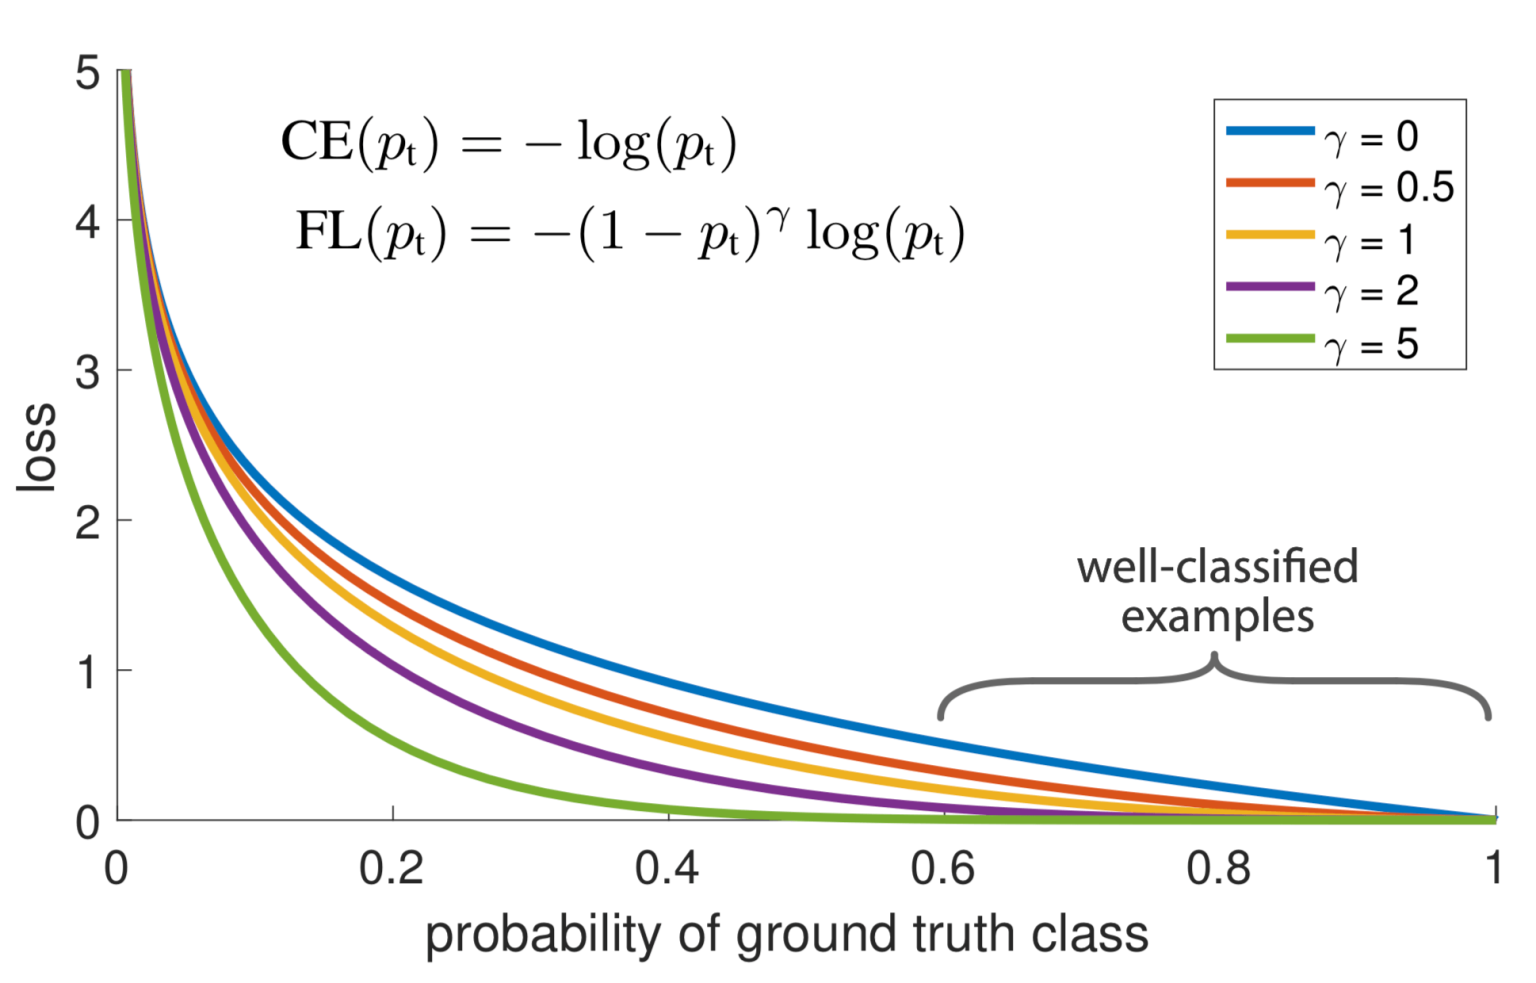

### Characteristics of Focal Loss

1. When an example is **misclassified and pt is small**, `the modulating factor is near 1 and the loss is unaffected`.
2. As **pt→  1**, the factor goes to 0 and the loss for well-classified examples is down weighed.
3. The focusing parameter **γ smoothly adjusts the rate at which easy examples are down-weighted**.

As is increased, the effect of modulating factor is likewise increased. (After a lot of experiments and trials, researchers have found γ = 2 to work best)

**Note:-** when γ =0, FL is equivalent to CE. Shown blue curve in Fig

* Intuitively, **the modulating factor reduces the loss contribution from easy examples** and **extends the range in which an example receives the low loss**.

**End Points:**
Retina Net is a powerful model that uses **Feature Pyramid Network & ResNet as its backbone.**

In general RetinaNet is a good choice to start an object detection project, in particular if you need to quickly get good results.

For code implemenation of Retina Net, Refer following links:
- https://keras.io/examples/vision/retinanet/
- https://www.analyticsvidhya.com/blog/2020/08/how-to-build-a-face-mask-detector-using-retinanet-model/
(Can be added durectly as part of this notebook)

